In [26]:
from cirq_qubitization.quantum_graph.bloq_counts import get_counts_graph, print_counts_graph, \
    GraphvizCounts, markdown_bloq_expr, markdown_counts_graph, SympySymbolAllocator

## Basic counts graph of And

In [34]:
from cirq_qubitization.bloq_algos.and_bloq import MultiAnd, And


graph, sigma = get_counts_graph(MultiAnd(cvs=(1,)*6))
print_counts_graph(graph)

MultiAnd(cvs=(1, 1, 1, 1, 1, 1), adjoint=False) -- 5 -> And(cv1=1, cv2=1, adjoint=False)
And(cv1=1, cv2=1, adjoint=False) -- 9 -> ArbitraryClifford(n=2)
And(cv1=1, cv2=1, adjoint=False) -- 4 -> TGate()


In [35]:
markdown_counts_graph(graph)

 - `MultiAnd(cvs=(1, 1, 1, 1, 1, 1), adjoint=False)`
   - `And(cv1=1, cv2=1, adjoint=False)`: $\displaystyle 5$
 - `And(cv1=1, cv2=1, adjoint=False)`
   - `ArbitraryClifford(n=2)`: $\displaystyle 9$
   - `TGate()`: $\displaystyle 4$


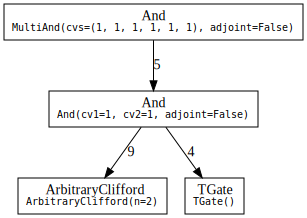

In [36]:
GraphvizCounts(graph).get_svg()

In [37]:
for bloq, expr in sigma.items():
    print(bloq, expr)

ArbitraryClifford(n=2) 45
TGate() 20


## Importance of canonicalization

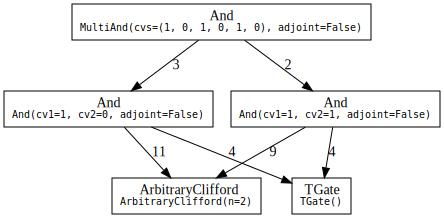

In [38]:
graph, sigma = get_counts_graph(MultiAnd(cvs=(1,0)*3))
GraphvizCounts(graph).get_svg()

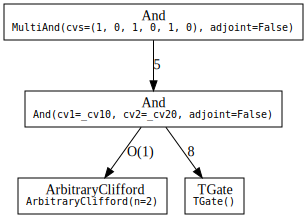

In [41]:
import attrs

ss = SympySymbolAllocator()
cv1 = ss.new_symbol('cv1')
cv2 = ss.new_symbol('cv2')


def canonicalize(bloq):
    if isinstance(bloq, And):
        return attrs.evolve(bloq, cv1=cv1, cv2=cv2)
    
    return bloq

graph, sigma = get_counts_graph(MultiAnd(cvs=(1,0)*3), ss, canonicalize)
GraphvizCounts(graph).get_svg()